In [23]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

df = pd.read_csv('NSE-TATAGLOBAL11.csv')

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [30]:
import keras
# import keras.backend as T
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
k=int(0.75*len(new_data))
train = dataset[0:k,:]
valid = dataset[k:,:]

#dataset to train variables
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(1,len(train)):
    x_train.append(scaled_data[i-1:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#Building model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

inputs = new_data[len(new_data) - len(valid) - 1:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test= [['04-10-2019']]
# for i in range(60,inputs.shape[0]):
#     X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

print('Shape: ',X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
closing_price

C:\Users\Amisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
 - 12s - loss: 0.0117
Shape:  (1, 1)


ValueError: could not convert string to float: '04-10-2019'

In [21]:
inputs

array([[0.21447781],
       [0.2097714 ],
       [0.20394442],
       [0.21313312],
       [0.2218736 ],
       [0.21806365],
       [0.22097714],
       [0.21985657],
       [0.22904527],
       [0.22164948],
       [0.22613178],
       [0.24675034],
       [0.24002689],
       [0.23621694],
       [0.22254594],
       [0.22389063],
       [0.23038996],
       [0.2339758 ],
       [0.23016584],
       [0.22411475],
       [0.23285522],
       [0.23218288],
       [0.22501121],
       [0.20103093],
       [0.20999552],
       [0.20237562],
       [0.18870462],
       [0.17503362],
       [0.18108472],
       [0.19834155],
       [0.19161811],
       [0.19229045],
       [0.20954729],
       [0.22299417],
       [0.2339758 ],
       [0.23442403],
       [0.22568355],
       [0.2371134 ],
       [0.23285522],
       [0.23195876],
       [0.22164948],
       [0.24114747],
       [0.25011206],
       [0.25302555],
       [0.24899148],
       [0.24092335],
       [0.24294039],
       [0.242

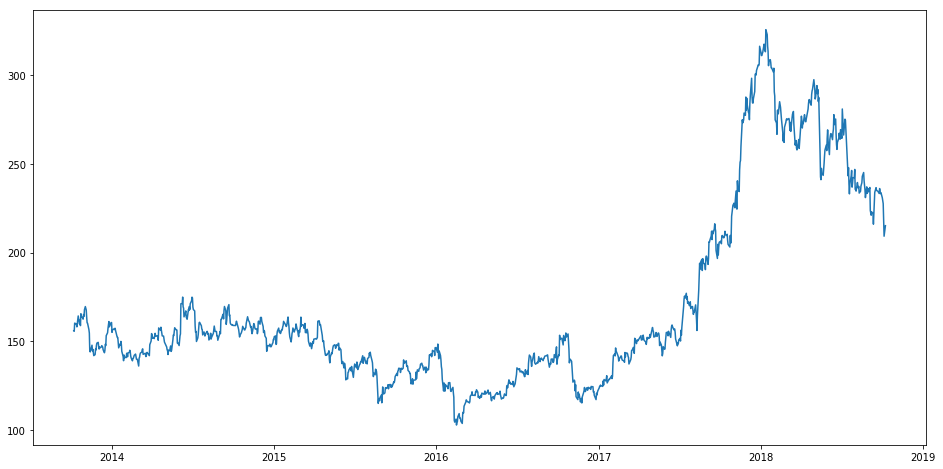

In [12]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [14]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

5.565942352373057

C:\Users\Amisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([[157.88826],
       [158.74268],
       [159.63814],
       [160.33055],
       [160.82816],
       [161.19939],
       [161.4228 ],
       [161.59572],
       [161.78313],
       [162.38293],
       [163.15285],
       [164.53917],
       [165.9789 ],
       [166.95297],
       [167.22734],
       [166.83287],
       [166.80127],
       [167.22214],
       [167.68744],
       [167.6762 ],
       [167.6232 ],
       [167.48624],
       [167.09029],
       [166.57161],
       [165.27492],
       [163.7419 ],
       [162.07097],
       [160.1679 ],
       [158.5565 ],
       [157.27061],
       [156.54866],
       [156.24718],
       [156.38866],
       [156.91776],
       [157.44528],
       [157.71904],
       [157.5875 ],
       [157.12503],
       [156.8088 ],
       [156.37988],
       [155.81203],
       [155.53772],
       [155.44043],
       [155.56712],
       [155.87509],
       [156.15216],
       [156.30557],
       [156.30766],
       [156.42741],
       [156.4505 ],


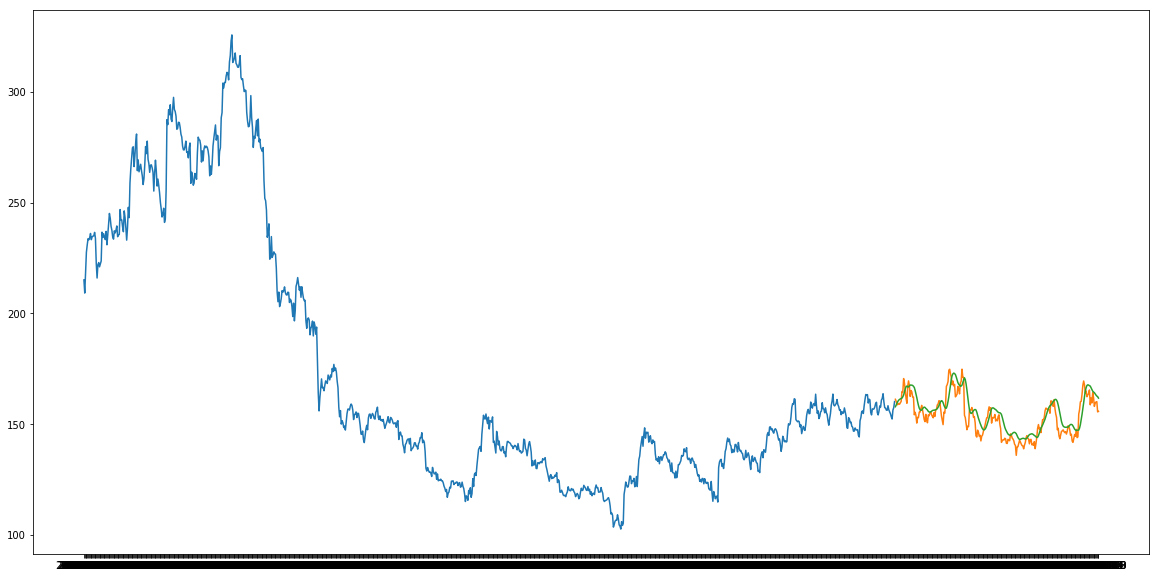

In [17]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
closing_price